In [1]:
# Multi-patches vlad encodes several area on the image seprately, then concat the vectors to form the final global representation
import joblib
import sklearn.cluster
import numpy as np
import multiprocessing as mp
import os
import ThesisToolkit
from ThesisToolkit import FeaturesIOToolkit as featuresIO
from delf import extractor
from sklearn.decomposition import IncrementalPCA
import ImageRepresentation
saved_model = "/mnt/datasets/codebook/delf_256_model.pkl"

/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
database_features_dir = "/mnt/datasets/daejeon_sv_v1_delf/"
images_dir = "/mnt/datasets/daejeon_sv_v1"
im = "600_gsv_3"
im_locs, im_des = featuresIO.DelfReadSingleImage(features_path = os.path.join(database_features_dir, im + '.delf'))
print(np.shape(im_des))

W1114 12:49:17.489700 140352007603968 deprecation.py:323] From /home/canhld/workplace/models/research/delf/delf/python/feature_io.py:171: FastGFile.__init__ (from tensorflow.python.platform.gfile) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.gfile.GFile.


(562, 40)


In [3]:
ir = ImageRepresentation.ImageRepresentation(name = 'delf_bow', saved_model = saved_model)
print(ir.codebook.cluster_centers_.shape)

(256, 40)


In [6]:
# patches layout
# grid: 0 --> fixed non-overlapped
#       1 --> fixed overlapped
#       2 --> multi-scale
#       3 --> region proposal
grid = 1
if grid == 0:
    patches = [(0,0,320,320),
            (320,0,640,320),
            (0,320,320,640),
            (320,320,640,640)]
else:
    patches = [(0,0,426,426),
            (213,0,640,213),
            (0,213,426,640),
            (213,213,640,640)]
# create a set of features for each patches
features_patches = [[],[],[],[]]
loc_patches = [[],[],[],[]]
for loc, des in zip(im_locs, im_des):
    for i in range(len(patches)):
        if(loc[0] >= patches[i][0] and loc[0] < patches[i][2] and loc[1] >= patches[i][1] and loc[1] < patches[i][3]):
            features_patches[i].append(des)
            loc_patches[i].append(loc)

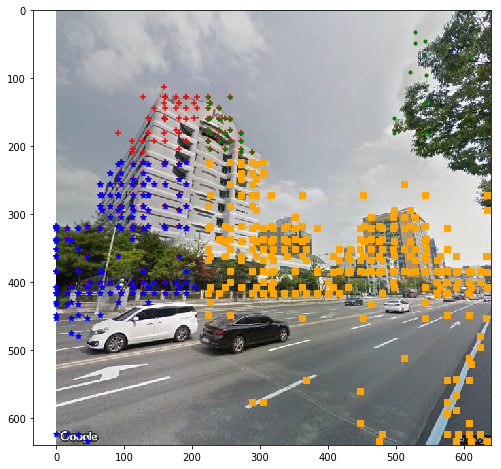

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import image as img
plt.figure(figsize=(20,8))
x = []
y = []
for patch in loc_patches:
    y.append(np.array(patch)[0:,0])
    x.append(np.array(patch)[0:,1])
image = img.imread(os.path.join(images_dir, im + '.jpg'))
plt.imshow(image)
plt.scatter(x[0], y[0],color='red', marker='+')
plt.scatter(x[1], y[1],color='blue', marker='*')
plt.scatter(x[2], y[2],color='green', marker='.')
plt.scatter(x[3], y[3],color='orange', marker='s')

In [12]:
vlad_patches = []
for features_patch in features_patches:
    vlad_patch = ir.VLADEncode(image_features = np.array(features_patch))
    vlad_patches.append(vlad_patch)
mpvlad_vec = np.ravel(vlad_patches)
image_vlad = ir.VLADEncode(image_features = im_des)
spp_vlad = np.concatenate([image_vlad, mpvlad_vec])
print(spp_vlad.shape)

(51200,)


In [8]:
features_dir = "/mnt/datasets/daejeon_sv_v1_query_delf/"
image_list, locs_list, descriptors_list = featuresIO.DelfReadDirectory(features_dir)

Loading DELF features
Load 57 features


In [36]:
grid = 1
ir = ImageRepresentation.ImageRepresentation(name = 'delf_mpvlad', saved_model = saved_model)
encoding = ir.MP_VLADEncode
args_list = [(descriptors, locs, grid) for descriptors, locs in zip(descriptors_list, locs_list)]
print(np.shape(args_list))
print(np.shape(descriptors_list))

(57, 3)
(57,)


In [43]:
import multiprocessing as mp
N = mp.cpu_count()
p = mp.Pool(processes=N)
vlad_vectors = p.starmap(encoding, args_list)

(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
(40960,)
